In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine = pd.read_csv(r"C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\PCA\wine.csv")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
wine.groupby('Type').agg(['mean']).reset_index()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_cluesterid,Clusterid_new
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.000000,1.000000
1,2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.112676,1.873239
2,3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000,0.000000


In [40]:
# Considering only numerical data 
wine_data = wine.iloc[:,1:]
wine_data.head()
# Converting into numpy array
wine_data1 = wine_data.values
wine_data1

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.065e+03, 0.000e+00,
        1.000e+00],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+03, 0.000e+00,
        1.000e+00],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.185e+03, 0.000e+00,
        1.000e+00],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 8.350e+02, 0.000e+00,
        0.000e+00],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 8.400e+02, 0.000e+00,
        0.000e+00],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 5.600e+02, 0.000e+00,
        0.000e+00]])

In [41]:
# Normalizing the numerical data 
wine_normal = scale(wine_data1)

In [42]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.01300893,
        -0.15161961, -0.09789492],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.96524152,
        -0.15161961, -0.09789492],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  1.39514818,
        -0.15161961, -0.09789492],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  0.28057537,
        -0.15161961, -1.34255887],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  0.29649784,
        -0.15161961, -1.34255887],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -0.59516041,
        -0.15161961, -1.34255887]])

In [43]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [44]:
pca_values

array([[-2.93467756, -2.09376043, -0.17371212, ..., -0.49024495,
         0.38152953, -0.15125031],
       [-2.0619971 , -0.3511591 , -1.96635743, ..., -0.23464772,
         0.28835811, -0.06219913],
       [-2.24370231, -1.49320161,  0.54263199, ...,  0.08605007,
         0.13968068, -0.09494346],
       ...,
       [ 3.28687184, -2.38383474, -0.28913199, ..., -0.90345447,
        -0.32532487, -0.00549772],
       [ 2.9409268 , -2.02753459, -0.00629449, ..., -0.45463621,
        -0.01418842, -0.04997746],
       [ 3.76628098, -2.18607166,  0.89427272, ...,  0.04839463,
        -0.31434635,  0.47454753]])

In [45]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(wine_normal)

In [46]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.33304118, 0.20394838, 0.11428108])

In [47]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([33.3 , 53.69, 65.12])

In [48]:
pca.components_

array([[-0.06858832,  0.26160896,  0.03253831,  0.21261555, -0.1044709 ,
        -0.36899876, -0.40674549,  0.28387438, -0.29860905,  0.15540008,
        -0.31953348, -0.38203682, -0.22169681, -0.0726582 , -0.26775446],
       [-0.46739469, -0.1361308 , -0.25438942,  0.09031313, -0.29229404,
        -0.14496533, -0.08908311,  0.05444024, -0.09772889, -0.45079912,
         0.17784822,  0.06289943, -0.3950609 , -0.01206647,  0.41013907],
       [-0.20595329,  0.06551576,  0.48091064,  0.53493743,  0.28695942,
         0.06881029,  0.08862385,  0.1269133 ,  0.12632263, -0.06598532,
         0.02500834,  0.07322062, -0.11982764,  0.53194881,  0.03449276]])

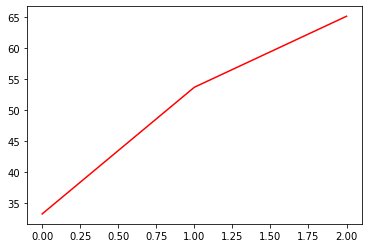

In [49]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [50]:
 pca_values[:,0:1]

array([[-2.93467756e+00],
       [-2.06199710e+00],
       [-2.24370231e+00],
       [-3.17473757e+00],
       [-8.53969077e-01],
       [-2.57534262e+00],
       [-2.11246639e+00],
       [-1.71485939e+00],
       [-2.19139494e+00],
       [-2.45682010e+00],
       [-3.09450559e+00],
       [-1.52163420e+00],
       [-1.85917912e+00],
       [-3.07487874e+00],
       [-3.76548426e+00],
       [-1.94102677e+00],
       [-1.74631555e+00],
       [-1.57601038e+00],
       [-2.99240915e+00],
       [-1.80493489e+00],
       [-2.83418835e+00],
       [-9.81556487e-01],
       [-2.37608571e+00],
       [-1.59148754e+00],
       [-1.69199687e+00],
       [-8.65091712e-01],
       [-1.55162973e+00],
       [-1.11622077e+00],
       [-1.97955192e+00],
       [-2.05787373e+00],
       [-2.20696939e+00],
       [-2.31200099e+00],
       [-1.50175822e+00],
       [-1.58979620e+00],
       [-1.22234639e+00],
       [-1.75922657e+00],
       [-1.20055762e+00],
       [-1.00976477e+00],
       [-1.4

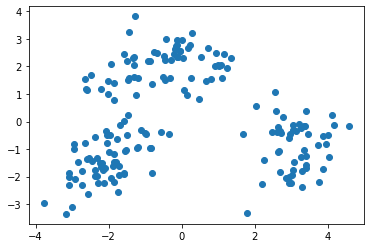

In [51]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [52]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

In [53]:
finalDf

,pc1,pc2,Type
0,-2.934678,-2.093760,1
1,-2.061997,-0.351159,1
2,-2.243702,-1.493202,1
3,-3.174738,-3.355720,1
4,-0.853969,-0.961273,1
...,...,...,...
173,3.878060,-1.717915,3
174,3.069506,-1.473625,3
175,3.286872,-2.383835,3
176,2.940927,-2.027535,3


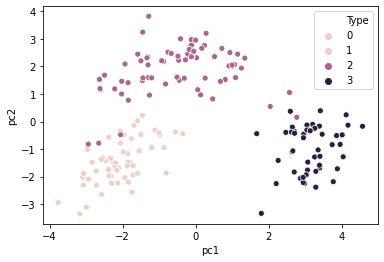

In [54]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

In [55]:
#Heirerachical clustering

In [56]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


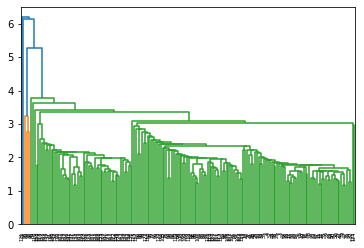

In [57]:
dendogram=sch.dendrogram(sch.linkage(wine_normal,method='single'))

In [58]:
#create clusters
hc= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [59]:
#save cluster for chart
y_hc=hc.fit_predict(wine_normal)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [60]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [61]:
wine['h_cluesterid']=hc.labels_

In [62]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_cluesterid,Clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0


In [63]:
from sklearn.cluster import KMeans


C:\Users\cheth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


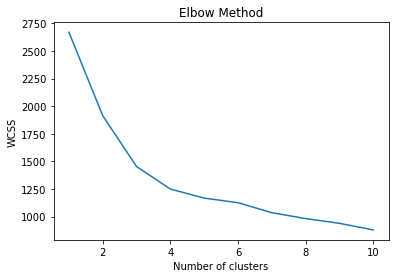

In [64]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(wine_normal)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [65]:
newCluster=KMeans(n_clusters=3,random_state=42)
newCluster.fit(wine_normal)

KMeans(n_clusters=3, random_state=42)

In [66]:
wine['Clusterid_new']=newCluster.labels_

In [67]:
newCluster.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796, -0.15161961, -1.34255887],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529,  0.17485165, -0.09789492],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618, -0.04781849,  1.14676903]])

In [68]:
wine.groupby('Clusterid_new').agg(['mean']).reset_index()

,Clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_cluesterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.000000
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,0.096774
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,0.030769


In [69]:
wine.groupby('Clusterid_new').agg(['count']).reset_index()

,Clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_cluesterid
,,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
0,0,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
1,1,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
2,2,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65


In [ ]:
# We have got 3 clusters in K means